## Dataset Information

Develop a Deep learning program to identify when an article might be fake news.


### Attributes
- id: unique id for a news article
- title: the title of a news article
- author: author of the news article
- text: the text of the article; could be incomplete
- label: a label that marks the article as potentially unreliable
    - 1: unreliable
    - 0: reliable

We are going to iterate through the text to decide if the article is reliable or not, because it not relavant to judge an article based on the title

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
df = pd.read_csv('train.csv')
df.head() #Displays first five entries of the dataset

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df['title'][0] #Viewing the title of our first tuple

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [4]:
df['text'][0] #Viewing the news content (text) of our first tuple
'''
As we can see below, we have unnessesary things like 
\n,punctuations etc which must be removed in data cleaning
'''

'\nAs we can see below, we have unnessesary things like \n\n,punctuations etc which must be removed in data cleaning\n'

In [5]:
df.info() 
'''summary includes list of all columns with their data types and the number of non-null values in each column'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


'summary includes list of all columns with their data types and the number of non-null values in each column'

## Data Proprocessing

In [6]:
# drop unnecessary columns
'''
We are dropping these colums because we analyse based on the
text and label(reliable/not)
'''
df = df.drop(columns=['id', 'title', 'author'], axis=1)
# axis=1 means we are dropping the row

In [7]:
# drop null values
df = df.dropna(axis=0)
# axis=0 means we are dropping the column

In [8]:
len(df)

20761

remove special characters and punctuations

In [9]:
df['clean_news'] = df['text'].str.lower() #converting everything to lowercase
df['clean_news']

0        house dem aide: we didn’t even see comey’s let...
1        ever get the feeling your life circles the rou...
2        why the truth might get you fired october 29, ...
3        videos 15 civilians killed in single us airstr...
4        print \nan iranian woman has been sentenced to...
                               ...                        
20795    rapper t. i. unloaded on black celebrities who...
20796    when the green bay packers lost to the washing...
20797    the macy’s of today grew from the union of sev...
20798    nato, russia to hold parallel exercises in bal...
20799      david swanson is an author, activist, journa...
Name: clean_news, Length: 20761, dtype: object

In [10]:
df['clean_news'] = df['clean_news'].str.replace('[^A-Za-z0-9\s]', '') 

'''
Replacing everything apart from alphanumeric with a space 
'''

df['clean_news'] = df['clean_news'].str.replace('\n', '') #Replacing \n with a space
df['clean_news'] = df['clean_news'].str.replace('\s+', ' ')#Replacing gaps with a space
df['clean_news']

0        house dem aide we didnt even see comeys letter...
1        ever get the feeling your life circles the rou...
2        why the truth might get you fired october 29 2...
3        videos 15 civilians killed in single us airstr...
4        print an iranian woman has been sentenced to s...
                               ...                        
20795    rapper t i unloaded on black celebrities who m...
20796    when the green bay packers lost to the washing...
20797    the macys of today grew from the union of seve...
20798    nato russia to hold parallel exercises in balk...
20799     david swanson is an author activist journalis...
Name: clean_news, Length: 20761, dtype: object

In [11]:
'''
Stopwords are commonly used words (such as “the”, “a”, “an”, “in”)
which are basically are of no use for our analysis so we remove them.
'''
# remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

'''We split the whole article into single word, and we are setting the condition,
if word not in stopwords then it'll form a list of such words and concatnate these into a sentance, 
using the lambda function'''

df['clean_news'] = df['clean_news'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
df.head()

,text,label,clean_news
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide didnt even see comeys letter ja...
1,Ever get the feeling your life circles the rou...,0,ever get feeling life circles roundabout rathe...
2,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fired october 29 2016 tension ...
3,Videos 15 Civilians Killed In Single US Airstr...,1,videos 15 civilians killed single us airstrike...
4,Print \nAn Iranian woman has been sentenced to...,1,print iranian woman sentenced six years prison...


Our data is now clean so now we can proceed to perform analysis on our data

## Exploratory Data Analysis

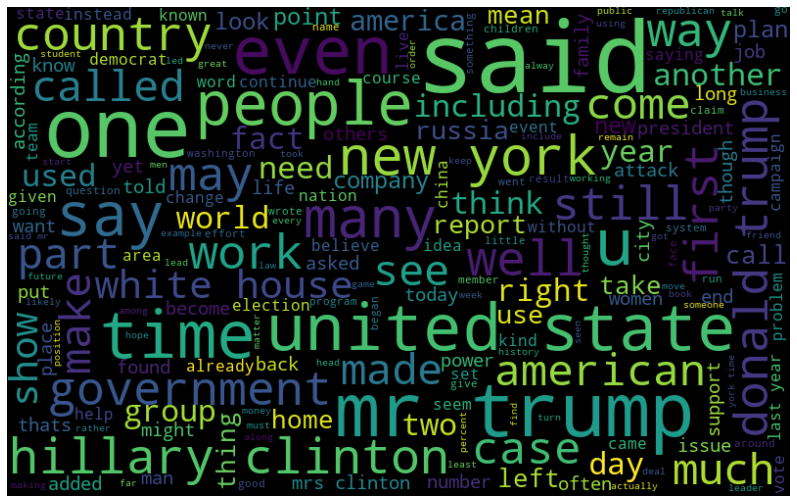

In [12]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_news']])#concatnating everything into a string
#genarating the wordcloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9)) #dimensions
plt.imshow(wordcloud, interpolation='bilinear') #to display data as image
plt.axis('off')
plt.show()

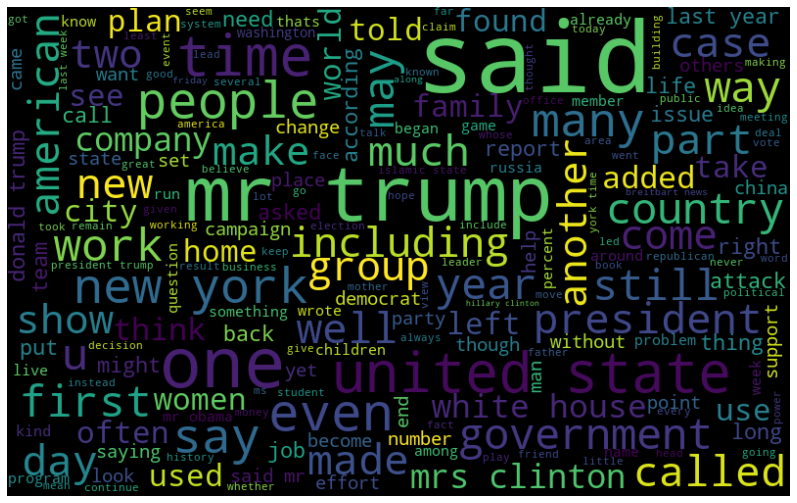

In [13]:
# visualize the frequent words for genuine news
# Since we set the label to zero we get to see wordcloud for the genuine news
all_words = " ".join([sentence for sentence in df['clean_news'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

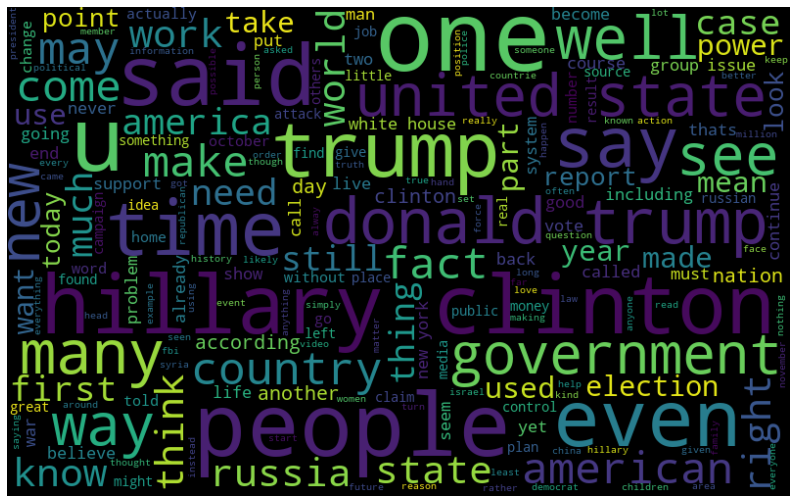

In [14]:
# visualize the frequent words for fake news
# Since we set the label to one we get to see wordcloud for the fake news
all_words = " ".join([sentence for sentence in df['clean_news'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Create Word Embeddings

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [16]:
# tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_news'])#This method creates the vocabulary index based on word frequency
word_index = tokenizer.word_index #gives us all unique words in data corpus
vocab_size = len(word_index)
vocab_size

199536

In [17]:
# padding data
'''
padding is important because each article has a different length, to equalize lengths it adds padding wherever needed
'''
'''
takes each word in the 'clean_news' and replaces it with its corresponding integer value from the 
word_index dictionary
'''
sequences = tokenizer.texts_to_sequences(df['clean_news'])
#Ensure that all sequences in a list have the same length, padding to be done after the article till it reaches 500 char length
padded_seq = pad_sequences(sequences, maxlen=500, padding='post', truncating='post')

In [18]:
# create embedding index
#Glove contains vectors of words in hundred dimensions
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        #the zeroth value is the word itself
        word = values[0]
        #get all the values from 1st index
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

In [19]:
# create embedding matrix only for the words from our dataset
embedding_matrix = np.zeros((vocab_size+1, 100))
'''
If the particular word from the dataset is'nt present in the embedding index
then, it'll return none, we need not add such cases into embedding matrix

If its not null and result is 100 we add it to the embedding matrix
'''
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

A look at our embedding matrix,

In [20]:
embedding_matrix[1]

array([-0.13128   , -0.45199999,  0.043399  , -0.99798   , -0.21053   ,
       -0.95867997, -0.24608999,  0.48413   ,  0.18178   ,  0.47499999,
       -0.22305   ,  0.30063999,  0.43496001, -0.36050001,  0.20245001,
       -0.52594   , -0.34707999,  0.0075873 , -1.04970002,  0.18673   ,
        0.57369   ,  0.43814   ,  0.098659  ,  0.38769999, -0.22579999,
        0.41911   ,  0.043602  , -0.73519999, -0.53583002,  0.19276001,
       -0.21961001,  0.42515001, -0.19081999,  0.47187001,  0.18826   ,
        0.13357   ,  0.41839001,  1.31379998,  0.35677999, -0.32172   ,
       -1.22570002, -0.26635   ,  0.36715999, -0.27586001, -0.53245997,
        0.16786   , -0.11253   , -0.99958998, -0.60706002, -0.89270997,
        0.65156001, -0.88783997,  0.049233  ,  0.67110997, -0.27553001,
       -2.40050006, -0.36989   ,  0.29135999,  1.34979999,  1.73529994,
        0.27000001,  0.021299  ,  0.14421999,  0.023784  ,  0.33643001,
       -0.35475999,  1.09210002,  1.48450005,  0.49430001,  0.15

## Input Split

In [21]:
padded_seq[1]
'''
Each index maps to a word, this is 1st article, also it has the padded data
'''

'\nEach index maps to a word, this is 1st article, also it has the padded data\n'

In [22]:
#Splitting data into 80-20 (train-test)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded_seq, df['label'], test_size=0.20, random_state=42, stratify=df['label'])

## Model Training

In [23]:
from keras.layers import LSTM, GRU,Dropout, Dense, Embedding
from keras import Sequential

model = Sequential([
    #Layer 1
    Embedding(vocab_size+1, 100, weights=[embedding_matrix], trainable=False),
    #Layer 2
    Dropout(0.2),
    #Layer 3
    LSTM(128),
    #Layer 4
    Dropout(0.2),
    #Layer 5
    Dense(256),
    #Layer 6
    Dense(1, activation='sigmoid')
])

model1 = Sequential([
    #Layer 1
    Embedding(vocab_size+1, 100, weights=[embedding_matrix], trainable=False),
    #Layer 2
    Dropout(0.2),
    #Layer 3
    GRU(128),
    #Layer 4
    Dropout(0.2),
    #Layer 5
    Dense(256),
    #Layer 6
    Dense(1, activation='sigmoid')
])

In [24]:
#loss='binary_crossentropy' because we are classifying binary (real/fake)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         19953700  
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 20,104,229
Trainable params: 150,529
Non-t

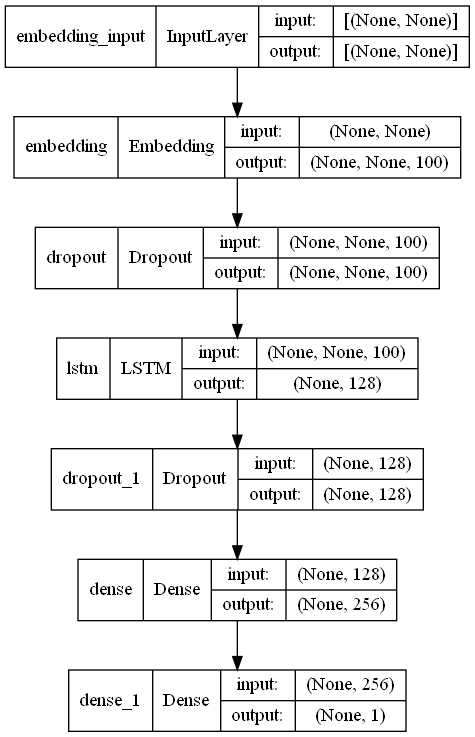

In [25]:
from tensorflow.keras.utils import plot_model
import pydot
import graphviz
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [26]:
#loss='binary_crossentropy' because we are classifying binary (real/fake)
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         19953700  
                                                                 
 dropout_2 (Dropout)         (None, None, 100)         0         
                                                                 
 gru (GRU)                   (None, 128)               88320     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 20,075,301
Trainable params: 121,601
Non

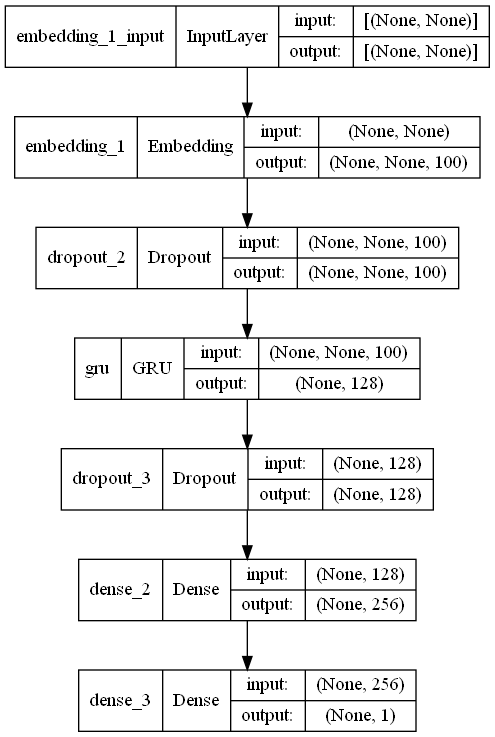

In [27]:
from tensorflow.keras.utils import plot_model
import pydot
import graphviz
plot_model(model1, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

In [28]:
# train the model
history = model.fit(x_train, y_train, epochs=51, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/51
65/65 [==============================] - 125s 2s/step - loss: 0.6190 - accuracy: 0.6659 - val_loss: 0.5896 - val_accuracy: 0.6504
Epoch 2/51
65/65 [==============================] - 146s 2s/step - loss: 0.5943 - accuracy: 0.6687 - val_loss: 0.5982 - val_accuracy: 0.6713
Epoch 3/51
65/65 [==============================] - 154s 2s/step - loss: 0.6298 - accuracy: 0.6420 - val_loss: 0.6608 - val_accuracy: 0.6167
Epoch 4/51
65/65 [==============================] - 159s 2s/step - loss: 0.6462 - accuracy: 0.6158 - val_loss: 0.6314 - val_accuracy: 0.6407
Epoch 5/51
65/65 [==============================] - 162s 2s/step - loss: 0.6229 - accuracy: 0.6428 - val_loss: 0.7467 - val_accuracy: 0.5259
Epoch 6/51
65/65 [==============================] - 165s 3s/step - loss: 0.6678 - accuracy: 0.5938 - val_loss: 0.6346 - val_accuracy: 0.6335
Epoch 7/51
65/65 [==============================] - 166s 3s/step - loss: 0.6291 - accuracy: 0.6334 - val_loss: 0.6114 - val_accuracy: 0.6627
Epoch 8/51
65

In [29]:
# train the model 1
history1 = model1.fit(x_train, y_train, epochs=51, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/51
65/65 [==============================] - 124s 2s/step - loss: 0.6505 - accuracy: 0.6180 - val_loss: 0.6449 - val_accuracy: 0.6188
Epoch 2/51
65/65 [==============================] - 118s 2s/step - loss: 0.6144 - accuracy: 0.6439 - val_loss: 0.5932 - val_accuracy: 0.6812
Epoch 3/51
65/65 [==============================] - 118s 2s/step - loss: 0.5719 - accuracy: 0.6895 - val_loss: 0.5545 - val_accuracy: 0.6990
Epoch 4/51
65/65 [==============================] - 117s 2s/step - loss: 0.5118 - accuracy: 0.7432 - val_loss: 0.4077 - val_accuracy: 0.8148
Epoch 5/51
65/65 [==============================] - 118s 2s/step - loss: 0.5333 - accuracy: 0.7537 - val_loss: 0.5927 - val_accuracy: 0.7132
Epoch 6/51
65/65 [==============================] - 118s 2s/step - loss: 0.5298 - accuracy: 0.7267 - val_loss: 0.4216 - val_accuracy: 0.7948
Epoch 7/51
65/65 [==============================] - 118s 2s/step - loss: 0.3920 - accuracy: 0.8186 - val_loss: 0.3470 - val_accuracy: 0.8420
Epoch 8/51
65

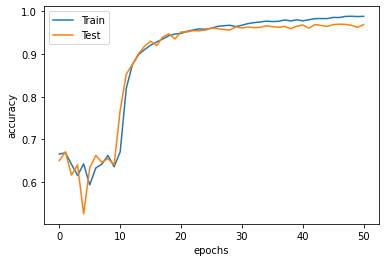

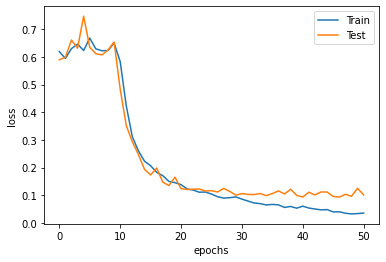

In [30]:
# visualize the results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

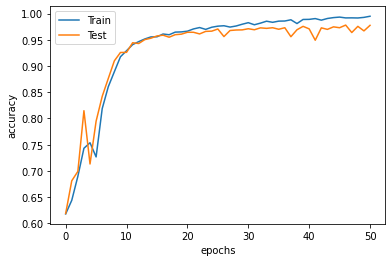

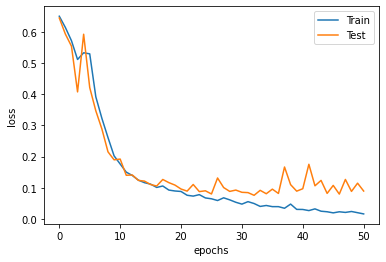

In [31]:
# visualize the results
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()